In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

In [2]:
#Finansal Tablo
#Finanslar adlı excel sayfasına ait verilerin çekilmesi
bankalar = ["AKBNK", "HALKB", "ISYAT", "QNBFB", "YKBNK"]
bankalar_veri = {}
for banka in bankalar:
    dosya_yolu = f"C:/Users/berky/Desktop/Career/Python/banka/Veriler/{banka}.xlsx"
    sheet_adi = "Finanslar"
    finansal_veri = pd.read_excel(dosya_yolu, sheet_name=sheet_adi)
    finansal_veri = finansal_veri.drop(finansal_veri.tail(2).index)
    finansal_veri[banka] = pd.to_datetime(finansal_veri[banka], format="%Y/%m")
    finansal_veri.set_index(banka, inplace=True)
    finansal_veri = finansal_veri.sort_index()
    bankalar_veri[banka] = finansal_veri
for banka, df in bankalar_veri.items():
    globals()[f'{banka}_finansal'] = df

   


In [3]:
#Karlılık adlı excel sayfasına ait verilerin çekilmesi
bankalar = ["AKBNK", "HALKB", "ISYAT", "QNBFB", "YKBNK"]
bankalar_veri = {}
for banka in bankalar:
    dosya_yolu = f"C:/Users/berky/Desktop/Career/Python/banka/Veriler/{banka}.xlsx"
    sheet_adi = "Karlılık"
    finansal_veri = pd.read_excel(dosya_yolu, sheet_name=sheet_adi)
    finansal_veri = finansal_veri.drop(finansal_veri.tail(2).index)
    finansal_veri[banka] = pd.to_datetime(finansal_veri[banka], format="%Y/%m")
    finansal_veri.set_index(banka, inplace=True)
    finansal_veri = finansal_veri.sort_index()
    bankalar_veri[banka] = finansal_veri
for banka, df in bankalar_veri.items():
    globals()[f'{banka}_karlılık'] = df


In [4]:
#Oluşturulmuş 2 dataframe'in birleştirilmesi
banks = {
    'AKBNK': (AKBNK_finansal, AKBNK_karlılık),
    'HALKB': (HALKB_finansal, HALKB_karlılık),
    'ISYAT': (ISYAT_finansal, ISYAT_karlılık),
    'QNBFB': (QNBFB_finansal, QNBFB_karlılık),
    'YKBNK': (YKBNK_finansal, YKBNK_karlılık)
}
merged_dfs = {}
for bank, (finansal_df, karlılık_df) in banks.items():
    merged_dfs[bank] = pd.merge(finansal_df, karlılık_df, on=bank, how='inner')
for bank_name in bankalar:
    globals()[f"{bank_name}"] = merged_dfs[bank_name]
selected_columns_dfs = {}
for bank_name in bankalar:
    selected_columns_dfs[bank_name] = pd.DataFrame(merged_dfs[bank_name].iloc[:, [10, 11]])#Net Kar ve Sermaye Yeterlilik Oranı Sütunlarının çekilmesi



In [18]:
for bank_name in bankalar:
    print(bank_name,selected_columns_dfs[bank_name].describe())

AKBNK        Net Kar Çeyrek (Mln TL)  Sermaye Yeterlilik Oranı
count                16.000000                 16.000000
mean              10381.745000                 21.767500
std                7256.413428                  1.434115
min                1522.800000                 19.260000
25%                2934.130000                 20.947500
50%               10817.565000                 21.820000
75%               15530.465000                 22.372500
max               21800.770000                 24.920000
HALKB        Net Kar Çeyrek (Mln TL)  Sermaye Yeterlilik Oranı
count                16.000000                 16.000000
mean               2247.995000                 14.428750
std                1972.968243                  1.138437
min                  59.040000                 13.070000
25%                 461.162500                 13.625000
50%                2043.490000                 14.390000
75%                3644.050000                 14.875000
max                

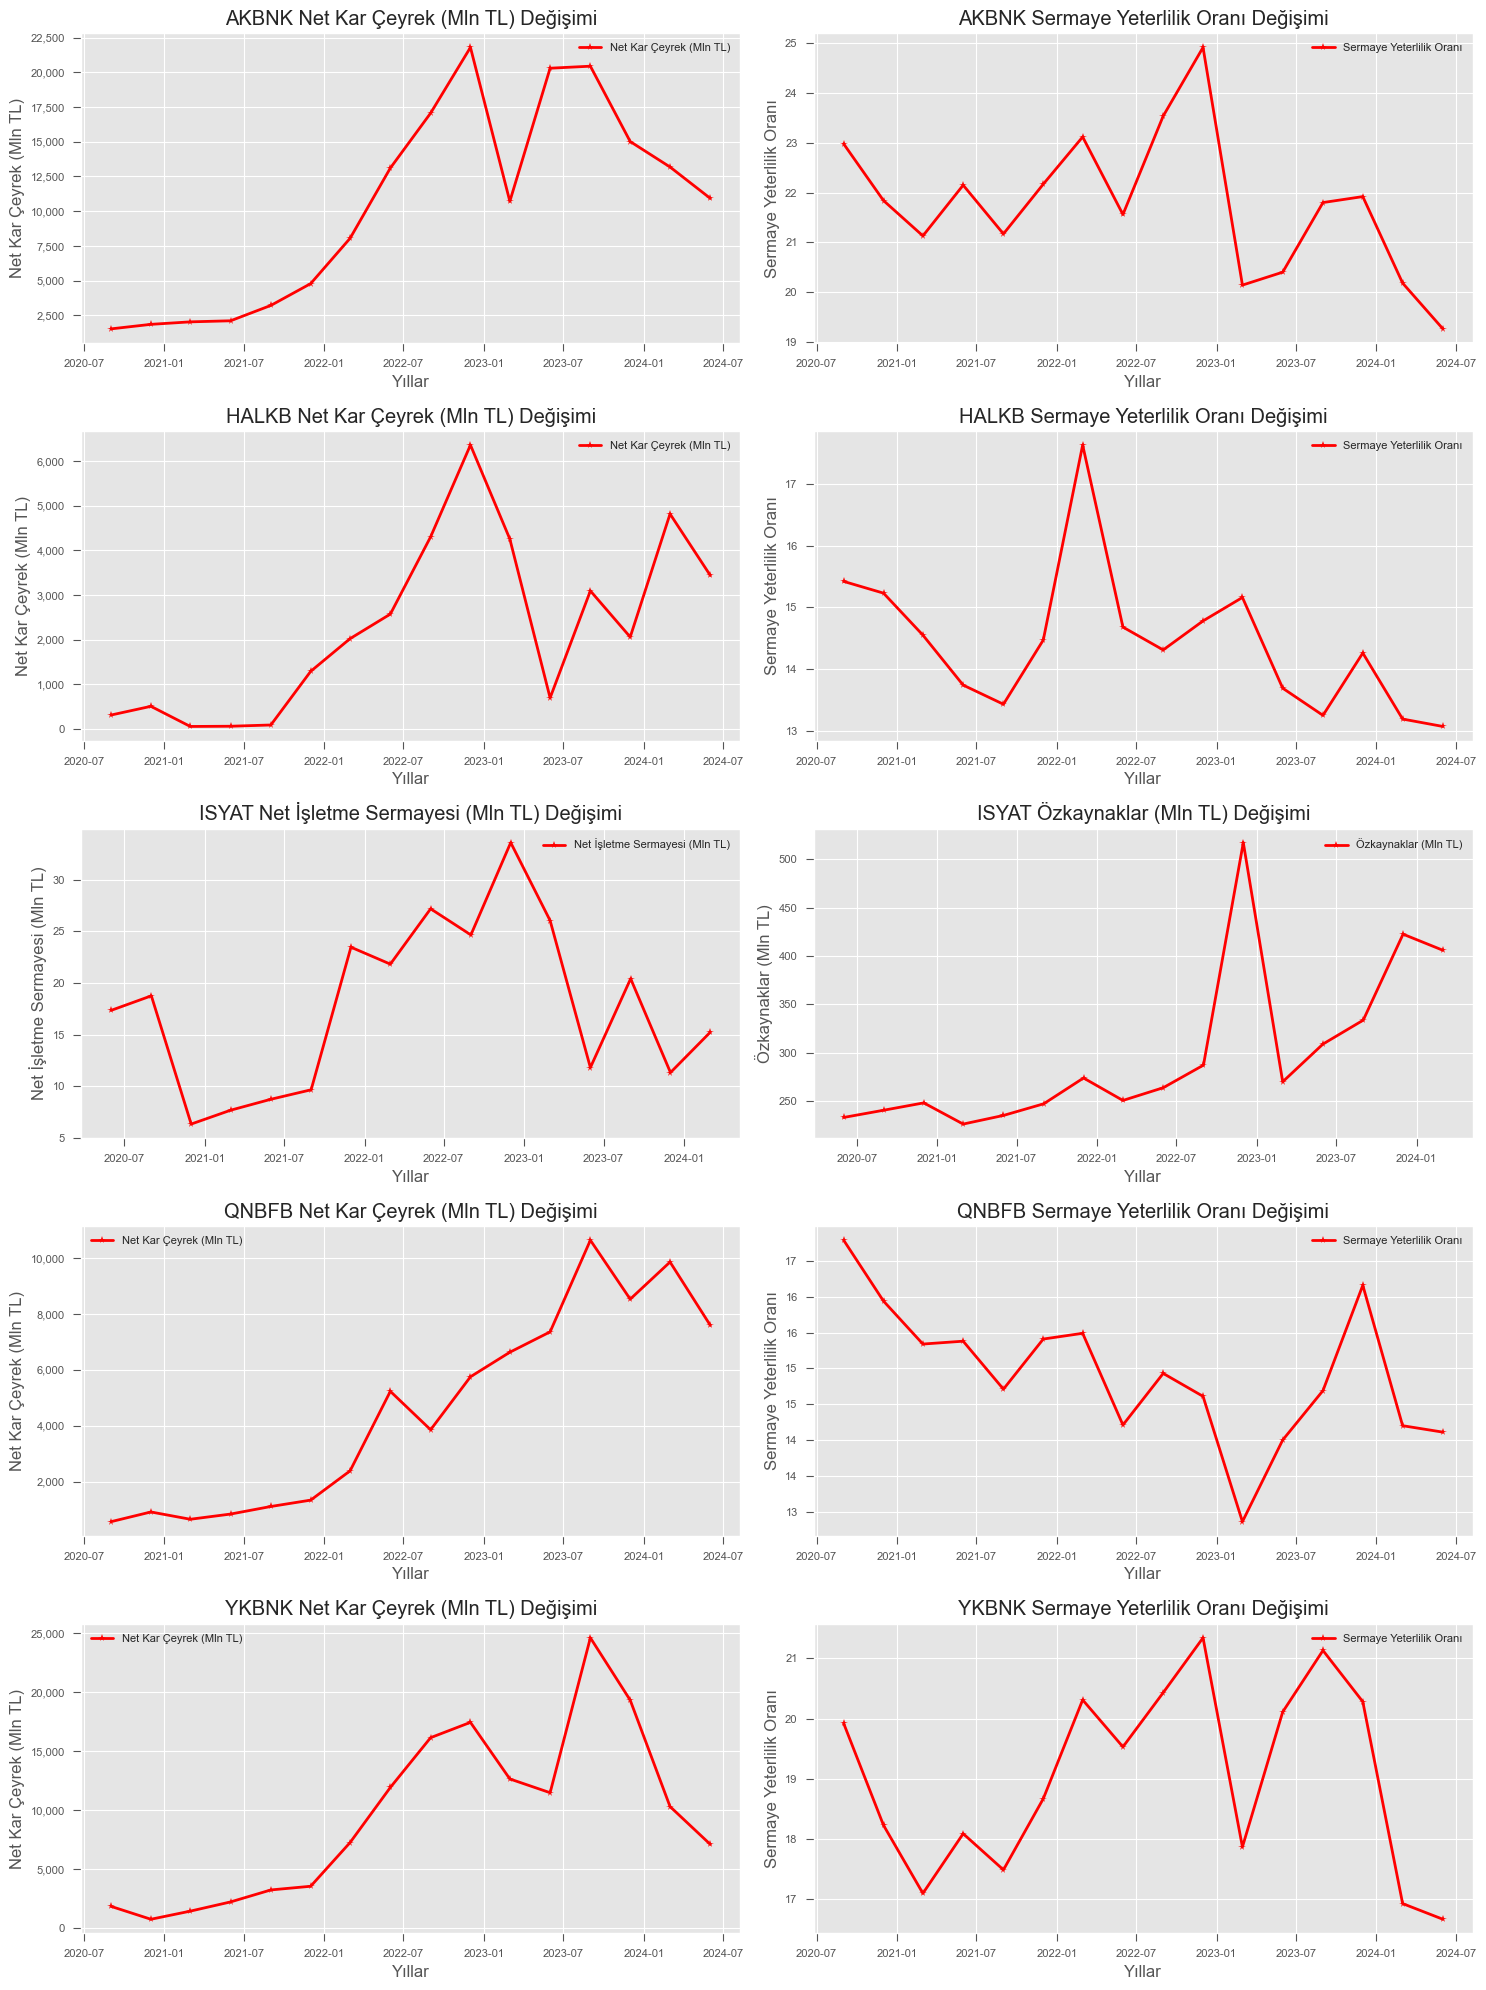

In [9]:
#İlgili Sütunların Görselleştirilmesi
plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()
index = 0
for bank_name in bankalar:
    for column in selected_columns_dfs[bank_name].columns:
        ax = axes[index]
        ax.set_title(f"{bank_name} {column} Değişimi")
        ax.set_xlabel("Yıllar")
        ax.set_ylabel(column)
        
        ax.plot(
            selected_columns_dfs[bank_name].index,
            selected_columns_dfs[bank_name][column],
            color="red",
            linewidth=2,
            marker="*",
            label=column
        )
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        ax.legend()
        index += 1
plt.tight_layout()
plt.show()

In [10]:
#Bilanço verilerinin çekilmesi
bankalar_1= ["AKBNK_bilanço", "HALKB_bilanço", "QNBFB_bilanço", "YKBNK_bilanço"]
bankalar_veri = {}
for banka in bankalar_1:
    dosya_yolu = f"C:/Users/berky/Desktop/Career/Python/banka/Veriler/{banka}.xlsx"
    sheet_adi = "Sheet1"
    bilanço_veri = pd.read_excel(dosya_yolu, sheet_name=sheet_adi)
    bilanço_veri.set_index('Bilanço', inplace=True)
    bankalar_veri[banka] = bilanço_veri
for banka, df in bankalar_veri.items():
    df = bankalar_veri[banka].loc[["III. NET FAİZ GELİRİ/GİDERİ (I - II)",
                 "IV. NET ÜCRET VE KOMİSYON GELİRLERİ/GİDERLERİ",
                 "I. MEVDUAT",
                 "1.1 Kredilerden Alınan Faizler",
                 "XVI. ÖZKAYNAKLAR"]]
    bankalar_veri[banka] = df
    bankalar_veri[banka].to_excel(f"C:/Users/berky/Desktop/Career/Python/banka/veriler/{banka}_güncel.xlsx")

In [11]:
#İş Yatırım'a ait bilanço verilerinin çekilmesi
ISYAT_bilanço=pd.read_excel("C:/Users/berky/Desktop/Career/Python/banka/Veriler/ISYAT_bilanço.xlsx")
ISYAT_bilanço.set_index("Bilanço",inplace=True)
ISYAT_bilanço
ISYAT_bilanço=ISYAT_bilanço.loc[["  Nakit ve Nakit Benzerleri","Satış Gelirleri","Satışların Maliyeti (-)","Net Faaliyet Kar/Zararı","Dönen Varlıklar","Duran Varlıklar","  Dönem Net Kar/Zararı","Dönem Sonu Nakit"]]
ISYAT_bilanço.to_excel("C:/Users/berky/Desktop/Career/Python/banka/veriler/ISYAT_güncel.xlsx")


In [34]:
#Tarihler sütunlarının düzenlenmesi
bankalar_2= ["AKBNK","HALKB","ISYAT","QNBFB","YKBNK"]
bankalar_veri_2 = {}
for banka in bankalar_2:
    dosya_yolu = f"C:/Users/berky/Desktop/Career/Python/banka/Veriler/{banka}_bilanço_temizlenmiş.xlsx"
    sheet_adi = "Sheet1"
    son_veri = pd.read_excel(dosya_yolu, sheet_name=sheet_adi)
    bankalar_veri_2[banka] = son_veri
    bankalar_veri_2[banka]["Tarihler"]=pd.to_datetime(bankalar_veri_2[banka]["Tarihler"],format='%Y/%m')
    bankalar_veri_2[banka].set_index("Tarihler",inplace=True)
    bankalar_veri_2[banka].sort_index(inplace=True)



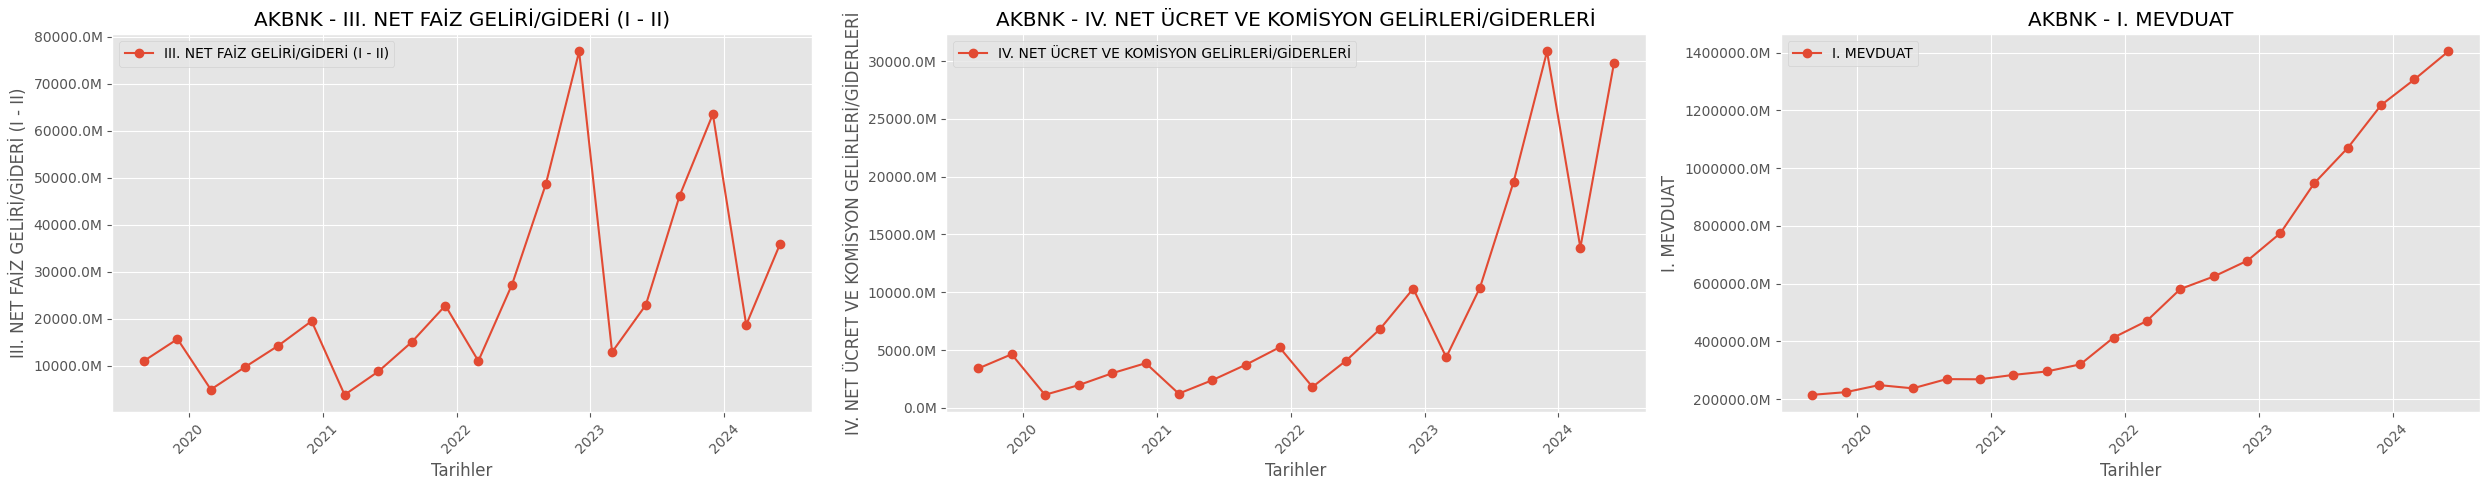

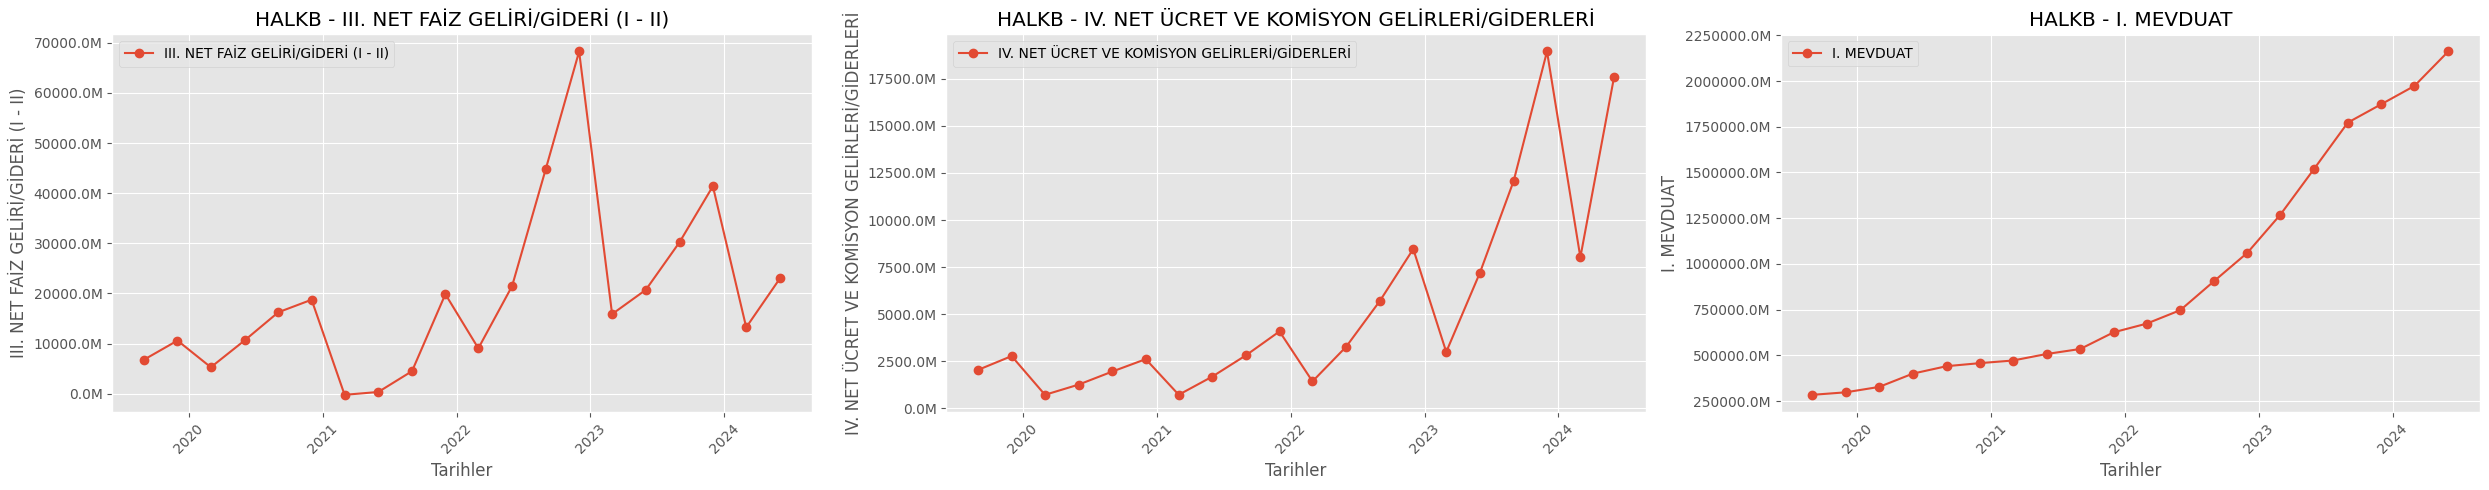

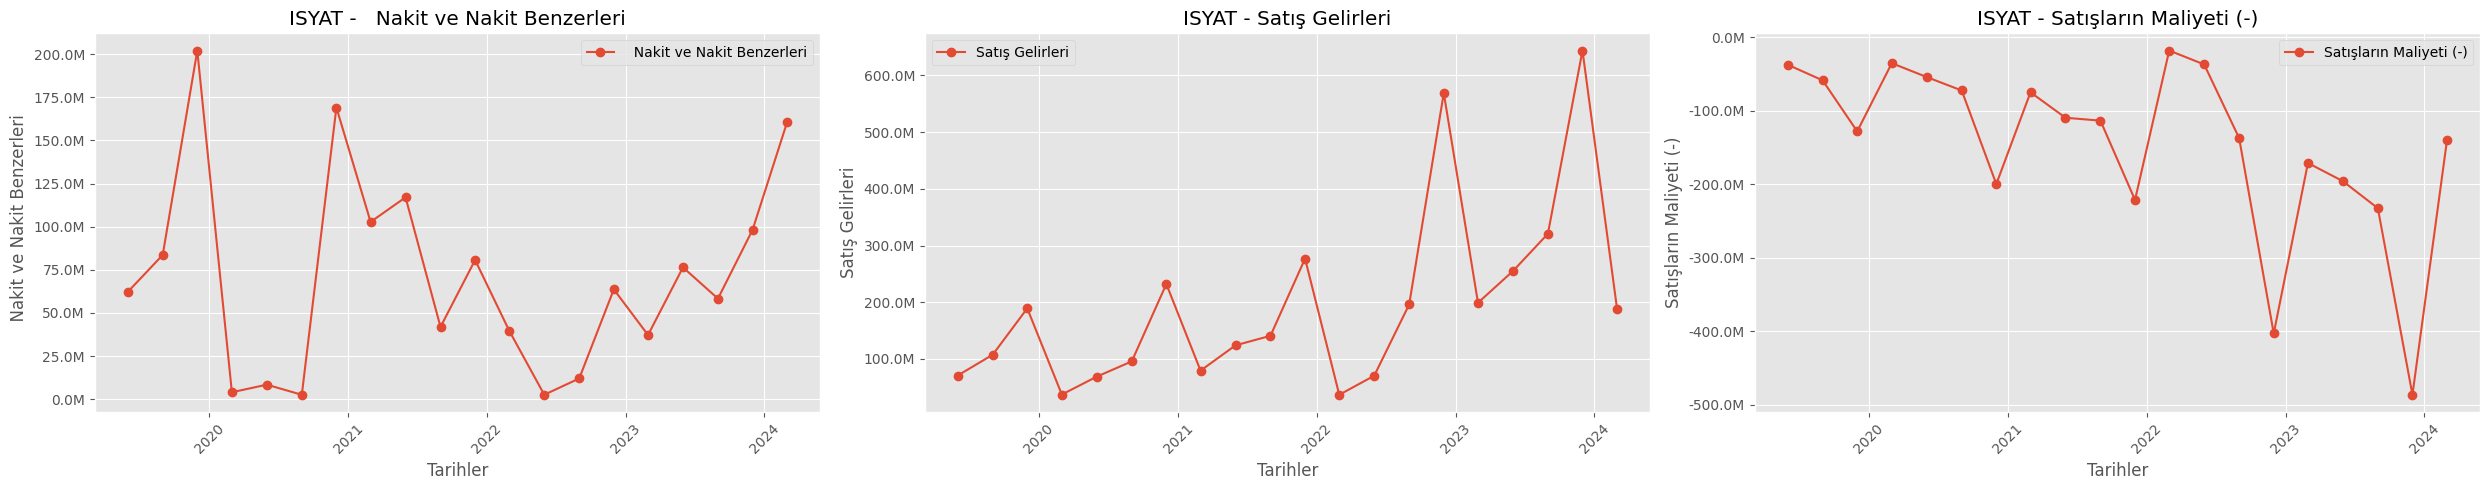

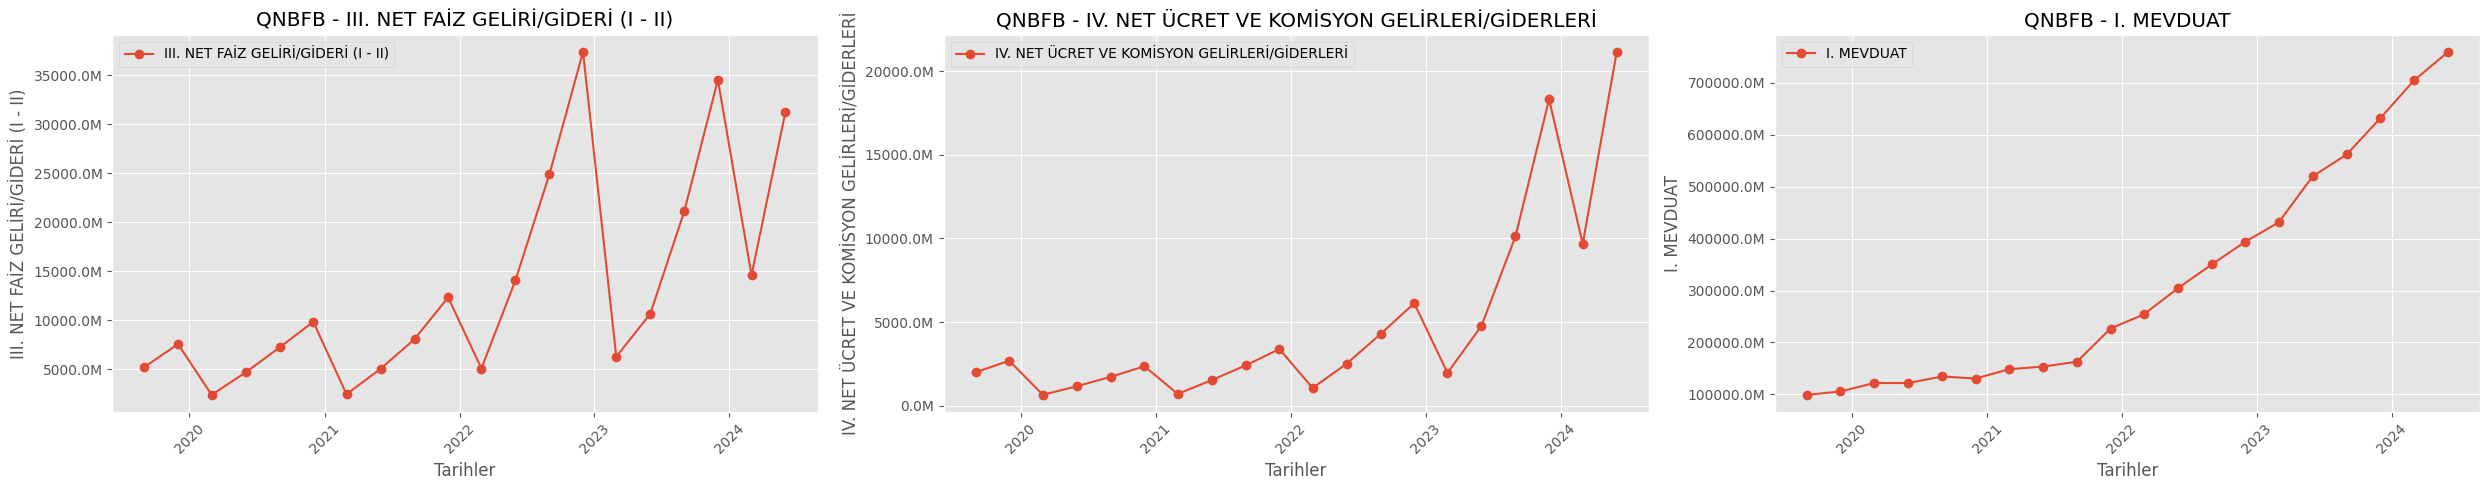

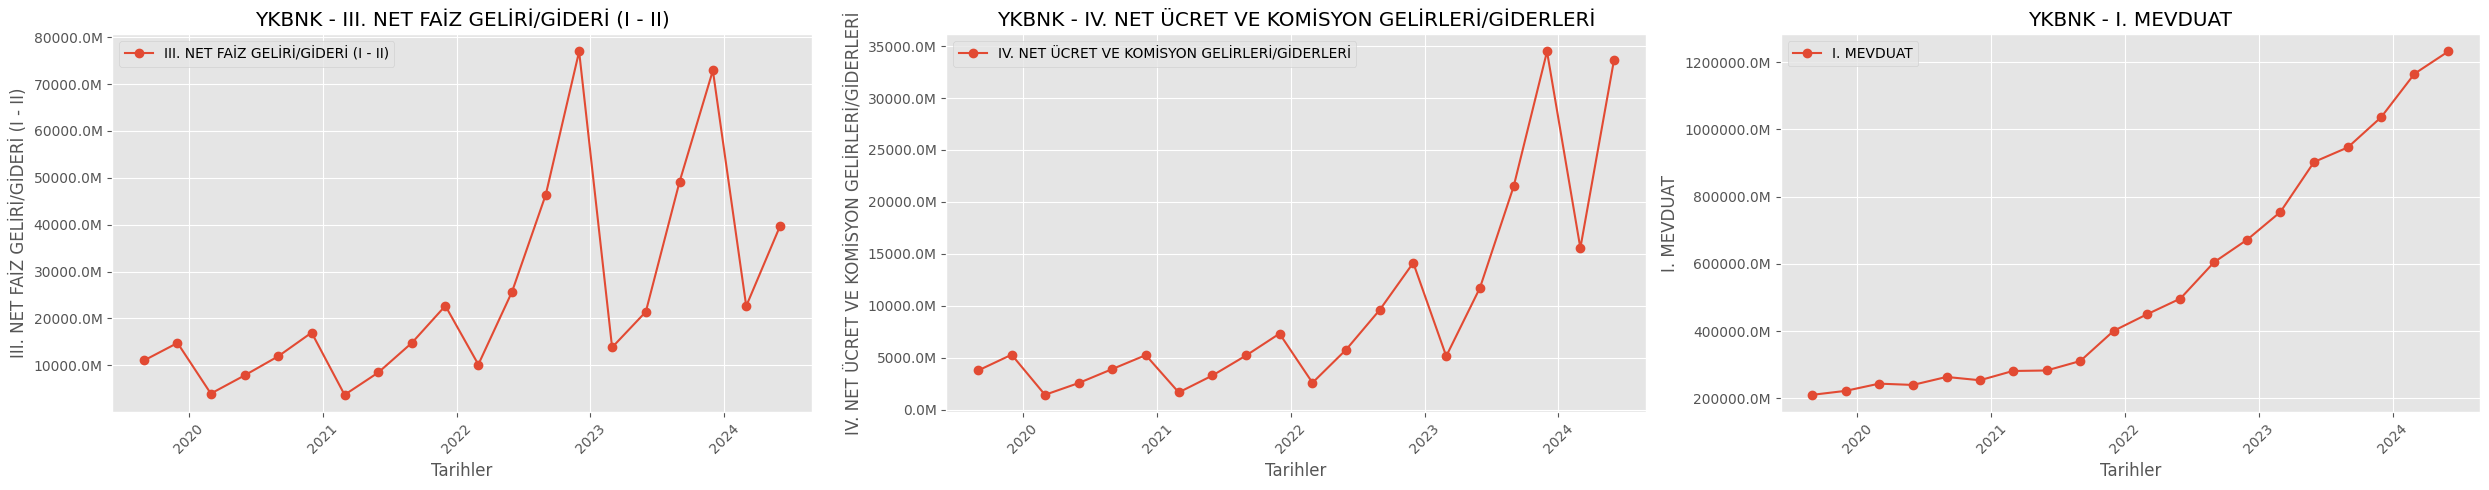

In [38]:
#İlgili sütunların görselleştirilmesi
def millions_formatter(x, pos):
    return f'{x*1e-6:.1f}M' 
for banka, df in bankalar_veri_2.items():
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
    axes = axes.flatten()
    for index, column in enumerate(df.columns):
        if index >= len(axes):
            break  
        ax = axes[index]
        ax.plot(df.index, df[column], marker='o', label=column)
        ax.set_title(f'{banka} - {column}')
        ax.set_xlabel('Tarihler')
        ax.set_ylabel(column)
        ax.grid(True)
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))
        ax.legend()
        plt.setp(ax.get_xticklabels(), rotation=45) 
    for i in range(index + 1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


In [5]:
#Bankalara ait hisse senetleri verilerinin çekilmesi
df=pd.read_excel("C:/Users/berky/Desktop/Career/Python/Banka_Analiz/banka_analiz/stockdata_20240827.xlsx")
kodlar=["AKBNK","HALKB","ISYAT","QNBFB","YKBNK"]
dfs = {}

for kod in kodlar:
    dfs[kod] = df[df['CODE'] == kod]
    dfs[kod]["DATE"]=pd.to_datetime( dfs[kod]["DATE"],format="%Y-%m-%d")
    dfs[kod].set_index("DATE",inplace=True)
    dfs[kod].sort_index(inplace=True)
    columns_to_plot = dfs[kod].loc[:,["CLOSING_USD"]]



C:\Users\berky\AppData\Local\Temp\ipykernel_2484\3840304113.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[kod]["DATE"]=pd.to_datetime( dfs[kod]["DATE"],format="%Y-%m-%d")
C:\Users\berky\AppData\Local\Temp\ipykernel_2484\3840304113.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[kod]["DATE"]=pd.to_datetime( dfs[kod]["DATE"],format="%Y-%m-%d")
C:\Users\berky\AppData\Local\Temp\ipykernel_2484\3840304113.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

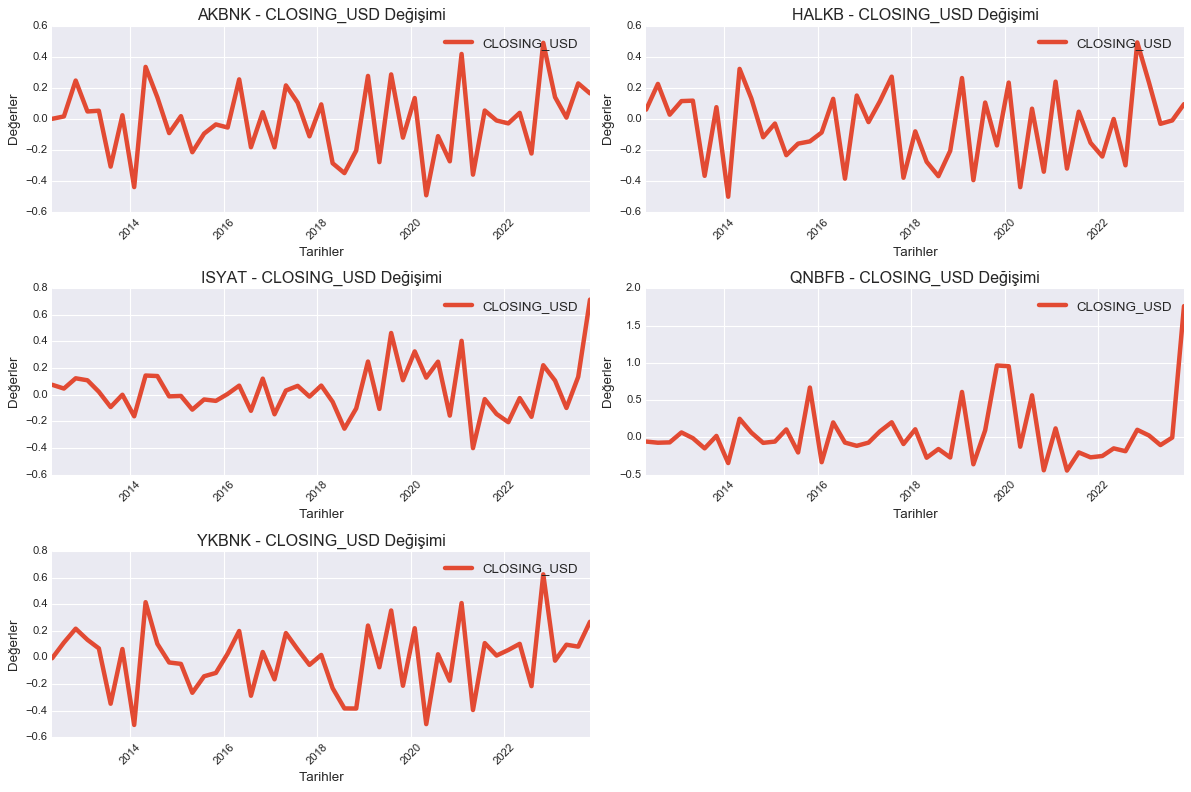

In [17]:

plt.style.use("seaborn-v0_8-dark")
num_plots = len(dfs)
nrows = (num_plots // 2) + (num_plots % 2)
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = axes.flatten()

for index, (kod, df) in enumerate(dfs.items()):
    if index >= len(axes):
        break  
    
    ax = axes[index]
    for column in columns_to_plot:
        if column in df.columns:
            ax.plot(df.index, df[column], label=column)
    
    ax.set_title(f'{kod} - {column} Değişimi')
    ax.set_xlabel('Tarihler')
    ax.set_ylabel('Değerler')
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# Eğer daha az subplot varsa, boş kalan subplotları gizle
for i in range(index + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [10]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
